In [100]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [101]:
df = pd.read_csv("/content/IRIS.csv")
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [102]:
df.shape

(150, 5)

In [103]:
df.nunique() # Unique values in all columns

sepal_length    35
sepal_width     23
petal_length    43
petal_width     22
species          3
dtype: int64

In [104]:
df.isnull().sum() # No Missing Values

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [105]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [106]:
df.duplicated().sum() # Duplicates

3

In [107]:
df[df.duplicated()] # These are 3 duplicated rows

,sepal_length,sepal_width,petal_length,petal_width,species
34,4.9,3.1,1.5,0.1,Iris-setosa
37,4.9,3.1,1.5,0.1,Iris-setosa
142,5.8,2.7,5.1,1.9,Iris-virginica


In [108]:
df = df.drop_duplicates() # Duplicate rows are removed

<Axes: title={'center': 'Box plot of Iris classification dataset'}>

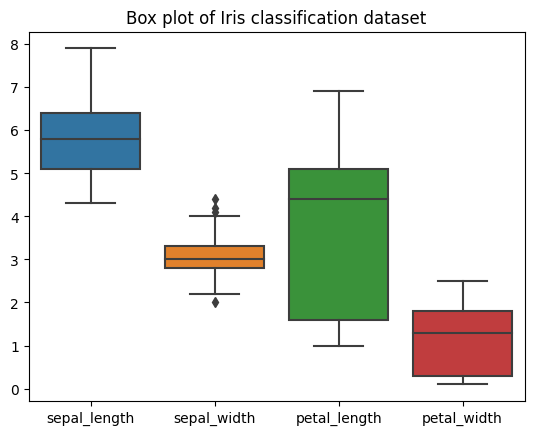

In [109]:
plt.title("Box plot of Iris classification dataset")
sns.boxplot(df)

In [110]:
df.shape

(147, 5)

In [111]:
from sklearn.preprocessing import LabelEncoder
encode = LabelEncoder()
target = encode.fit_transform(df['species']) # Converted Species column into numerical and rename as target

In [112]:
df.drop('species',axis=1,inplace=True)

In [113]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [114]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,147.000000,147.000000,147.000000,147.000000
mean,5.856463,3.055782,3.780272,1.208844
std,0.829100,0.437009,1.759111,0.757874
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.400000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


<Axes: >

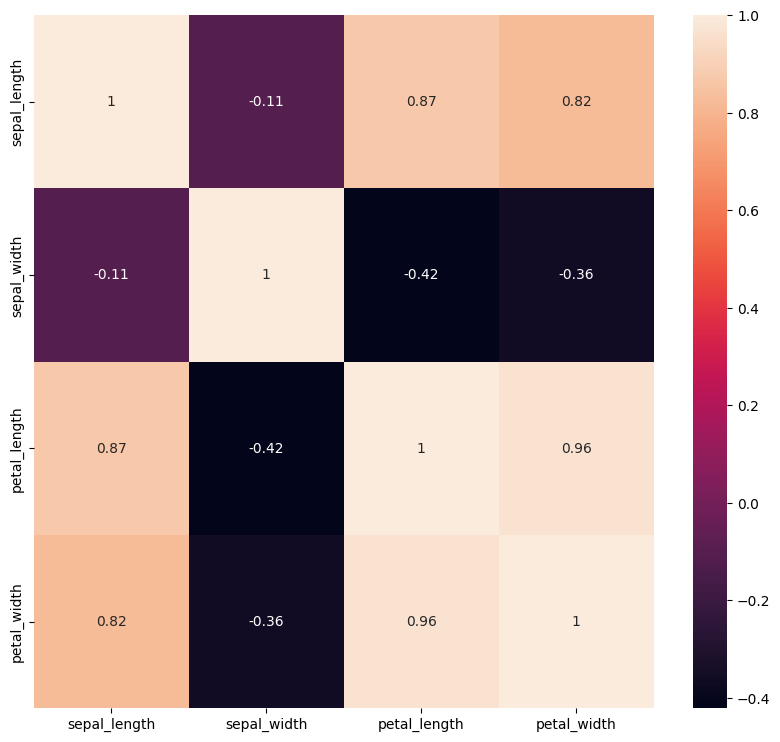

In [115]:
plt.figure(figsize=(10,9))
sns.heatmap(df.corr(),annot=True)

<Axes: ylabel='count'>

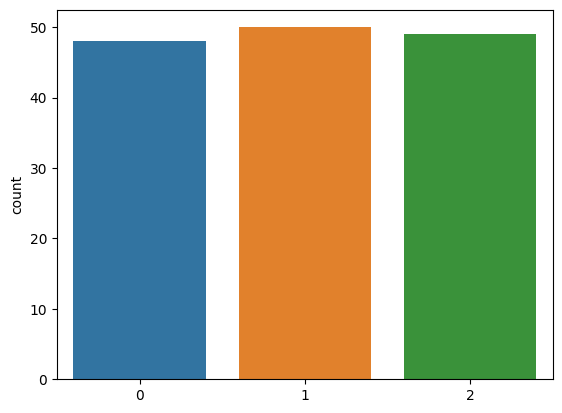

In [116]:
sns.countplot(data = df, x = target) # No.of Species in a dataset

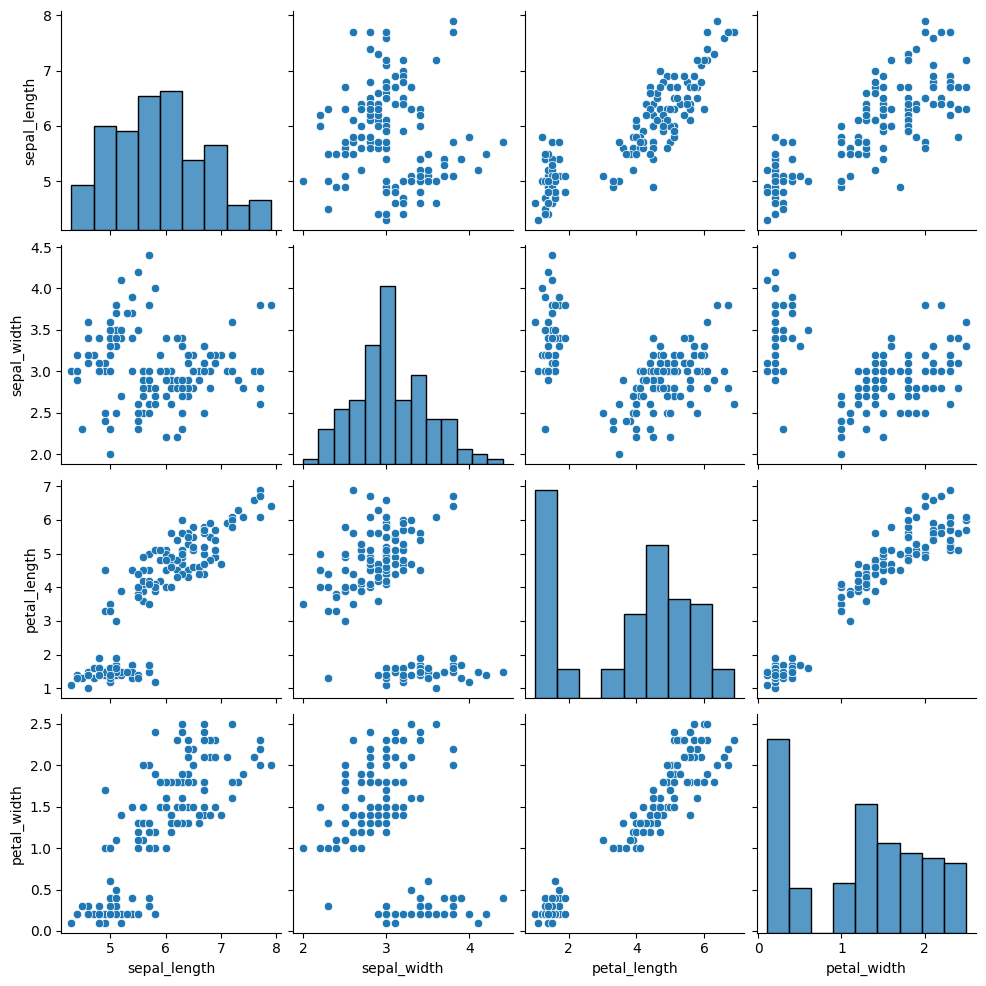

In [117]:
sns.pairplot(df)

In [118]:
x = df
y = target
print(x)
print(y)

     sepal_length  sepal_width  petal_length  petal_width
0             5.1          3.5           1.4          0.2
1             4.9          3.0           1.4          0.2
2             4.7          3.2           1.3          0.2
3             4.6          3.1           1.5          0.2
4             5.0          3.6           1.4          0.2
..            ...          ...           ...          ...
145           6.7          3.0           5.2          2.3
146           6.3          2.5           5.0          1.9
147           6.5          3.0           5.2          2.0
148           6.2          3.4           5.4          2.3
149           5.9          3.0           5.1          1.8

[147 rows x 4 columns]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 

In [119]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.33,random_state=42)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(98, 4)
(49, 4)
(98,)
(49,)


In [128]:
from sklearn.linear_model import LogisticRegression
parameter = {
    'penalty':['l1', 'l2', 'elasticnet'],
    'solver' : ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga']
}

In [122]:
lr = LogisticRegression()
lr.fit(x_train,y_train)

LogisticRegression()

0.9387755102040817
Axes(0.125,0.11;0.62x0.77)
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       0.92      0.86      0.89        14
           2       0.89      0.94      0.91        17

    accuracy                           0.94        49
   macro avg       0.94      0.93      0.93        49
weighted avg       0.94      0.94      0.94        49



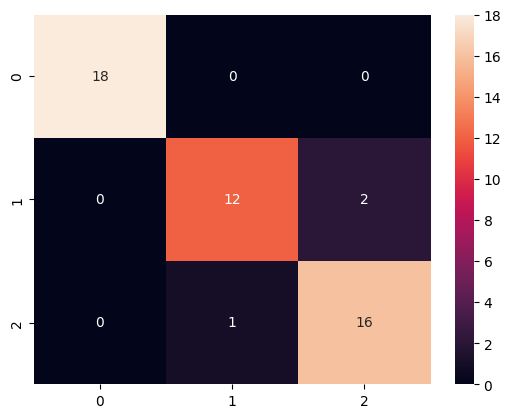

In [125]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
y_pred = lr.predict(x_test)
print(accuracy_score(y_pred,y_test))
print(sns.heatmap(confusion_matrix(y_pred,y_test),annot=True))
print(classification_report(y_pred,y_test))

In [130]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import GridSearchCV
lr1 = GridSearchCV(lr,param_grid = parameter,cv=5,scoring='accuracy')
lr1.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['lbfgs', 'liblinear', 'newton-cg',
                                    'newton-cholesky', 'sag', 'saga']},
             scoring='accuracy')

0.9795918367346939
Axes(0.125,0.11;0.62x0.77)
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       0.92      1.00      0.96        12
           2       1.00      0.95      0.97        19

    accuracy                           0.98        49
   macro avg       0.97      0.98      0.98        49
weighted avg       0.98      0.98      0.98        49



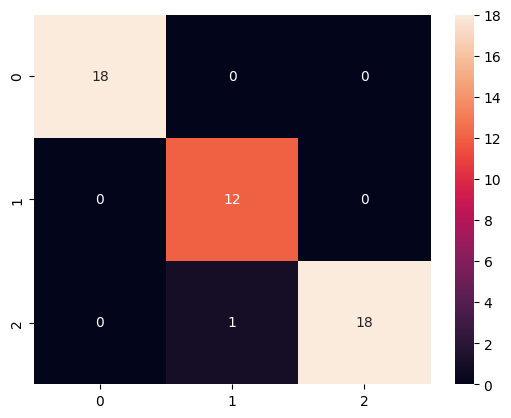

In [134]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
y_pred = lr1.predict(x_test)
print(accuracy_score(y_pred,y_test))
print(sns.heatmap(confusion_matrix(y_pred,y_test),annot=True))
print(classification_report(y_pred,y_test))

**Logistic Regression Accuracy is : 97.95%**

In [135]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(x_train,y_train)

RandomForestClassifier()

0.9591836734693877
Axes(0.125,0.11;0.62x0.77)
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       0.92      0.92      0.92        13
           2       0.94      0.94      0.94        18

    accuracy                           0.96        49
   macro avg       0.96      0.96      0.96        49
weighted avg       0.96      0.96      0.96        49



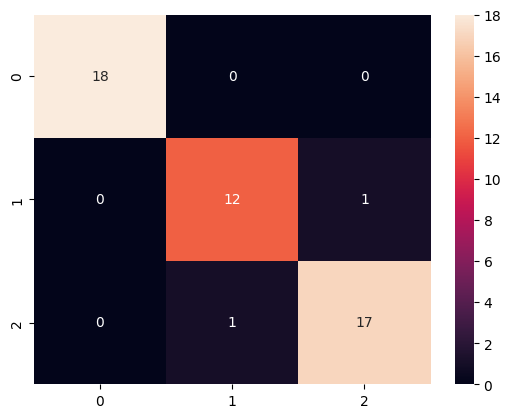

In [136]:
y_pred = rfc.predict(x_test)
print(accuracy_score(y_pred,y_test))
print(sns.heatmap(confusion_matrix(y_pred,y_test),annot=True))
print(classification_report(y_pred,y_test))

In [138]:
parameters = {
    'criterion' : ['gini', 'entropy', 'log_loss'],
    'max_features': ['sqrt', 'log2'],
    'max_depth' : [1,2,3,4,5,6,7,8,9,10]
}

In [139]:
rfc1 = GridSearchCV(rfc,param_grid=parameters,cv=5,verbose=3,scoring='accuracy')
rfc1.fit(x_train,y_train)

Fitting 5 folds for each of 60 candidates, totalling 300 fits
[CV 1/5] END criterion=gini, max_depth=1, max_features=sqrt;, score=0.900 total time=   0.6s
[CV 2/5] END criterion=gini, max_depth=1, max_features=sqrt;, score=0.950 total time=   0.5s
[CV 3/5] END criterion=gini, max_depth=1, max_features=sqrt;, score=1.000 total time=   0.6s
[CV 4/5] END criterion=gini, max_depth=1, max_features=sqrt;, score=1.000 total time=   0.5s
[CV 5/5] END criterion=gini, max_depth=1, max_features=sqrt;, score=0.895 total time=   1.0s
[CV 1/5] END criterion=gini, max_depth=1, max_features=log2;, score=0.900 total time=   0.4s
[CV 2/5] END criterion=gini, max_depth=1, max_features=log2;, score=0.950 total time=   0.3s
[CV 3/5] END criterion=gini, max_depth=1, max_features=log2;, score=1.000 total time=   0.3s
[CV 4/5] END criterion=gini, max_depth=1, max_features=log2;, score=1.000 total time=   0.3s
[CV 5/5] END criterion=gini, max_depth=1, max_features=log2;, score=0.895 total time=   0.2s
[CV 1/5]

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'max_features': ['sqrt', 'log2']},
             scoring='accuracy', verbose=3)

0.9591836734693877
Axes(0.125,0.11;0.62x0.77)
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       0.92      0.92      0.92        13
           2       0.94      0.94      0.94        18

    accuracy                           0.96        49
   macro avg       0.96      0.96      0.96        49
weighted avg       0.96      0.96      0.96        49



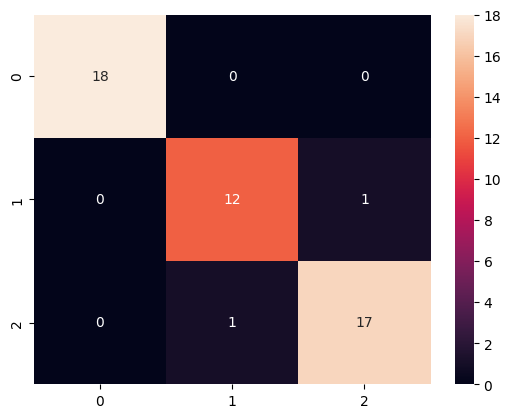

In [141]:
y_pred1 = rfc1.predict(x_test)
print(accuracy_score(y_pred1,y_test))
print(sns.heatmap(confusion_matrix(y_pred1,y_test),annot=True))
print(classification_report(y_pred1,y_test))

**RandomForestClassifier : 95.91%**

#**Logistic Regression : 97.95%**
#**RandomForestClassifier : 95.91%**
#***So, We can Conclude that we use Logistic regression because it has more accuracy : 97.95%***